In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%config inlineBackend.figure_format = 'retina'

# 1. Basic Operations

**Q1. Write code to create a DataFrame from a dictionary containing student names and their scores in three subjects (Math, Science, English).<br/>**
* Write a code to add a new column `Total Marks`, which calculates the total marks for each student.
* Print first five rows of the DataFrame and summary statistics using the `describe()` method.


```python
data = {
    'Name': ['Virat', 'Dhoni', 'Rohit', 'Sachin', 'Gavaskar'],
    'Math': [90, 80, 85, 70, 95],
    'Science': [85, 88, 90, 75, 92],
    'English': [78, 85, 82, 90, 88]
}
```

In [4]:
df_students = pd.DataFrame(data = {
    'Name': ['Virat', 'Dhoni', 'Rohit', 'Sachin', 'Gavaskar'],
    'Math': [90, 80, 85, 70, 95],
    'Science': [85, 88, 90, 75, 92],
    'English': [78, 85, 82, 90, 88]
})

df_students.eval('Total_Marks = (Math + Science + English)', inplace=True)

print(f"First five rows of the DataFrame:\n {df_students.head()}\n")
print(f"Summary statistics of :\n {df_students.describe()}")

First five rows of the DataFrame:
        Name  Math  Science  English  Total_Marks
0     Virat    90       85       78          253
1     Dhoni    80       88       85          253
2     Rohit    85       90       82          257
3    Sachin    70       75       90          235
4  Gavaskar    95       92       88          275

Summary statistics of :
             Math    Science    English  Total_Marks
count   5.000000   5.000000   5.000000     5.000000
mean   84.000000  86.000000  84.600000   254.600000
std     9.617692   6.670832   4.774935    14.240786
min    70.000000  75.000000  78.000000   235.000000
25%    80.000000  85.000000  82.000000   253.000000
50%    85.000000  88.000000  85.000000   253.000000
75%    90.000000  90.000000  88.000000   257.000000
max    95.000000  92.000000  90.000000   275.000000


**Q2 Create a dummy CSV file named students.csv containing the following columns: Name, Age, Gender, and Marks (atleast 5 entries). Perform the following tasks:**

- Load the file into a DataFrame using Pandas.
- Display the last 3 rows of the DataFrame.
- Print the total number of rows and columns in the DataFrame.

In [8]:
csv_df = pd.read_csv("students.csv")

print(csv_df.tail(3),"\n")

rows = csv_df.shape[0]
columns = csv_df.shape[1]

print(f"Total Rows: {rows}")
print(f"Total Columns: {columns}")

            Name  Age  Gender  Marks
2   Mark Johnson   16    Male     78
3    Emily Davis   15  Female     88
4  Michael Brown   17    Male     76 

Total Rows: 5
Total Columns: 4


**Q3.Create and populate a DataFrame with columns Employee_ID, Name, Department, and Salary. Now perform the following:**

- Add a new column Bonus where each employee gets 10% of their Salary.
- Increase the Salary of all employees in the IT department by 20%.
- Drop the Department column from the DataFrame.


In [ ]:
data = {
    'Employee_ID': ['E1', 'E2', 'E3', 'E4', 'E5'],
    'Name': ['Bhavya', 'Heer', 'Raj', 'Harsh', 'Aayush'],
    'Department': ['HR', 'IT', 'Finance', 'IT', 'HR'],
    'Salary': [50000, 60000, 55000, 58000, 52000],
}

df = pd.DataFrame(data)
df['Bonus'] = df['Salary']*0.1
df['Salary'] += df['Salary']*0.2
print(df.drop('Department', axis = 1))

  Employee_ID    Name   Salary   Bonus
0          E1  Bhavya  60000.0  5000.0
1          E2    Heer  72000.0  6000.0
2          E3     Raj  66000.0  5500.0
3          E4   Harsh  69600.0  5800.0
4          E5  Aayush  62400.0  5200.0


# 2. Indexing and Slicing

**Q1. You are given a data about employees' performance:**

```python
data = {
    'Employee': ['E1', 'E2', 'E3', 'E4', 'E5'],
    'Department': ['HR', 'IT', 'Finance', 'IT', 'HR'],
    'Salary': [50000, 60000, 55000, 58000, 52000],
    'Performance_Rating': [8.2, 7.8, 8.5, 7.4, 8.0],
    'Years_at_Company': [5, 3, 6, 2, 4]
}
```
Using boolean indexing, select employees who meet all of the following conditions:

- Belong to either 'HR' or 'IT' departments.
- Have a performance rating greater than or equal to 8.0.
- Earn a salary less than 55,000 or have been with the company for at least 4 years.


In [ ]:
data = {
    'Employee': ['E1', 'E2', 'E3', 'E4', 'E5'],
    'Department': ['HR', 'IT', 'Finance', 'IT', 'HR'],
    'Salary': [50000, 60000, 55000, 58000, 52000],
    'Performance_Rating': [8.2, 7.8, 8.5, 7.4, 8.0],
    'Years_at_Company': [5, 3, 6, 2, 4]
}

data_df = pd.DataFrame(data)


mask_1 = (data_df["Department"] == "HR") | ( data_df["Department"] == "IT")
data_df= data_df[mask_1]

mask_2 = data_df["Performance_Rating"] >= 8.0
data_df = data_df[mask_2]

mask_3 = ((data_df["Salary"]< 55000 )|( data_df["Years_at_Company"] >=4))
data_df= data_df[mask_3]

#The above can also be written in one line but it wasnt looking very readable so we didnt use that.
#mask = ((df['Department'] == 'HR') | (df['Department'] == 'IT')) & (df['Performance_Rating'] >= 8) & ((df['Salary'] < 55000) | (df['Years_at_Company'] >= 4))

print(data_df)

  Employee Department  Salary  Performance_Rating  Years_at_Company
0       E1         HR   50000                 8.2                 5
4       E5         HR   52000                 8.0                 4


**Q2. Slicing Rows and Columns**

```
data = {
    'Product': ['Laptop', 'Phone', 'Tablet', 'Monitor', 'Headphones'],
    'Price': [800, 400, 300, 150, 50],
    'Stock': [20, 35, 50, 10, 100],
    'Rating': [4.5, 4.2, 3.8, 4.8, 4.0]
}
```

Use slicing to select the following:

- The last 3 rows of the DataFrame.
- All columns except 'Stock' and 'Rating' from the first 3 rows.

In [282]:
data = {
    'Product': ['Laptop', 'Phone', 'Tablet', 'Monitor', 'Headphones'],
    'Price': [800, 400, 300, 150, 50],
    'Stock': [20, 35, 50, 10, 100],
    'Rating': [4.5, 4.2, 3.8, 4.8, 4.0]
}

df = pd.DataFrame(data)
df = df.set_index("Product")

print(f"Last 3 rows of the dataframe:\n {df[-3:]}\n")
print(f"All columns except 'Stock' and 'Rating' from the first 3 rows:\n {df.loc[:, ~df.columns.isin(["Stock", "Rating"])].head(3)}")

Last 3 rows of the dataframe:
             Price  Stock  Rating
Product                         
Tablet        300     50     3.8
Monitor       150     10     4.8
Headphones     50    100     4.0

All columns except 'Stock' and 'Rating' from the first 3 rows:
          Price
Product       
Laptop     800
Phone      400
Tablet     300


**Q3.Label-based Indexing with `.loc[]` and `.iloc[]`**

```
data = {
    'Name': ['John', 'Sara', 'Tom', 'Alex', 'Julia'],
    'Age': [29, 35, 40, 25, 31],
    'Salary': [50000, 60000, 75000, 45000, 52000],
    'Department': ['HR', 'Finance', 'IT', 'HR', 'IT']
}
```

Using .loc[] and .iloc[], perform the following tasks:

- Select the row corresponding to 'Tom' using label-based indexing.
- Select the first two rows and the 'Salary' and 'Department' columns using position-based indexing.

In [286]:
data = {
    'Name': ['John', 'Sara', 'Tom', 'Alex', 'Julia'],
    'Age': [29, 35, 40, 25, 31],
    'Salary': [50000, 60000, 75000, 45000, 52000],
    'Department': ['HR', 'Finance', 'IT', 'HR', 'IT']
}

df = pd.DataFrame(data)

print(f"The row corresponding to 'Tom':\n {df.loc[df["Name"] == "Tom"]}\n")
print(f"The first two rows and the 'Salary' and 'Department' columns:\n {df.iloc[:2, [2, 3]]}")

The row corresponding to 'Tom':
   Name  Age  Salary Department
2  Tom   40   75000         IT

The first two rows and the 'Salary' and 'Department' columns:
    Salary Department
0   50000         HR
1   60000    Finance


# 3. GroupBy and Aggregations


**Q1. You have a dataset of students' test scores. The dataset has the following columns:**

* StudentID: Unique ID of the student.
* Subject: The subject of the test.
* Score: The score obtained (out of 100).
```
data = pd.DataFrame({
    "StudentID": [1, 2, 3, 2, 3, 1],
    "Subject": ["Math", "Science", "Math",  "Math","Science", "Science"],
    "Score": [85, 90, 78, 88, 92, 95]
})
```

* Write a function to calculate the average score for each student. Use this function to group the data by StudentID and find the average score.

In [290]:
data = pd.DataFrame({
    "StudentID": [1, 2, 3, 2, 3, 1],
    "Subject": ["Math", "Science", "Math",  "Math","Science", "Science"],
    "Score": [85, 90, 78, 88, 92, 95]
})

average_score = data.groupby("StudentID")["Score"].mean()

print(f"The average score of each student :\n{average_score}")


The average score of each student :
StudentID
1    90.0
2    89.0
3    85.0
Name: Score, dtype: float64




**Q2. Create  a dataset of retail sales with a hierarchical index consisting of `Region` and `StoreID`. The dataset contains the following columns:**

* ProductCategory: The category of the product sold (e.g., Electronics, Clothing)

* Sales: The amount of sales made

*Group the data by respective level indices  and calculate:*

* Total sales in each region.
* Average sales in each store .


In [292]:
retail_sales = pd.DataFrame({
    'Region': ['North', 'North', 'North', 'South', 'South', 'South', 'East', 'East', 'West', 'West'],
    'StoreID': [1, 1, 2, 3, 3, 4, 5, 5, 6, 7],
    'ProductCategory': ['Electronics', 'Clothing', 'Clothing', 'Electronics', 'Clothing', 'Clothing', 'Electronics', 'Clothing', 'Electronics', 'Clothing'],
    'Sales': [500, 200, 300, 700, 400, 350, 800, 450, 900, 300]
})                                                                       #


retail_sales = retail_sales.set_index(["Region", "StoreID"])
print("Retail Sales Dataset:\n", retail_sales)

total_sales = retail_sales.groupby(level = "Region")["Sales"].sum()
print("\nTotal Sales by Region:\n", total_sales)

average_sales = retail_sales.groupby(level = ["Region", "StoreID"])["Sales"].mean()
print("\nAverage Sales by Store:\n", average_sales)


Retail Sales Dataset:
                ProductCategory  Sales
Region StoreID                       
North  1           Electronics    500
       1              Clothing    200
       2              Clothing    300
South  3           Electronics    700
       3              Clothing    400
       4              Clothing    350
East   5           Electronics    800
       5              Clothing    450
West   6           Electronics    900
       7              Clothing    300

Total Sales by Region:
 Region
East     1250
North    1000
South    1450
West     1200
Name: Sales, dtype: int64

Average Sales by Store:
 Region  StoreID
East    5          625.0
North   1          350.0
        2          300.0
South   3          550.0
        4          350.0
West    6          900.0
        7          300.0
Name: Sales, dtype: float64


**Q3. You are given a DataFrame `df_orders` as follows:**

```
df_orders = pd.DataFrame({
    'Category': ['Electronics', 'Electronics', 'Clothing', 'Clothing', 'Groceries', 'Groceries'],
    'Order_ID': ['O1', 'O2', 'O3', 'O4', 'O5', 'O6'],
    'Price': [1000, 500, 100, 200, 50, 60],
    'Discount': [50, 25, 10, 20, 5, 6],
    'Quantity': [1, 2, 3, 1, 4, 5]
})
```
- Group the data by "`Category`" and compute:
  - Total revenue `(Price * Quantity)`.
  - Total discounts given` (Discount * Quantity)`.

- For each category find the followng:
  * The order with the highest revenue.
  * The average discount per order.




In [95]:
df_orders = pd.DataFrame({
    'Category': ['Electronics', 'Electronics', 'Clothing', 'Clothing', 'Groceries', 'Groceries'],
    'Order_ID': ['O1', 'O2', 'O3', 'O4', 'O5', 'O6'],
    'Price': [1000, 500, 100, 200, 50, 60],
    'Discount': [50, 25, 10, 20, 5, 6],
    'Quantity': [1, 2, 3, 1, 4, 5]
})

df_orders["Total_Price"] = df_orders["Price"] * df_orders["Quantity"]
df_orders["Total_Discount"] = df_orders["Discount"] * df_orders["Quantity"]
grouped_df = df_orders.groupby("Category")[["Total_Price","Total_Discount"]].sum()
print(grouped_df,"\n")

max_idx = df_orders.groupby("Category")["Total_Price"].idxmax()  # gives the index of the row which contains the max revenue in each category.      
order_ids = df_orders.loc[max_idx, ["Category", "Order_ID"]]
order_ids = order_ids.set_index("Category")
print(f"Order ids with the highest revenue for each category: \n{order_ids}\n")

avg_discount = df_orders.groupby("Category")["Total_Discount"].mean()
print(f"The average discount per order: {avg_discount}")

             Total_Price  Total_Discount
Category                                
Clothing             500              50
Electronics         2000             100
Groceries            500              50 

Order ids with the highest revenue for each category: 
            Order_ID
Category            
Clothing          O3
Electronics       O1
Groceries         O6

The average discount per order: Category
Clothing       25.0
Electronics    50.0
Groceries      25.0
Name: Total_Discount, dtype: float64


## 4. Handling Missing Data

You are provided with a dataset, `numeric_df`, containing numeric features from the Titanic dataset. Your task is to explore and handle the missing data systematically.



In [296]:
# Load the Titanic dataset
df = sns.load_dataset('titanic')

# Select only numeric columns
numeric_df = df.select_dtypes(include = ['float64', 'int64'])

# Introducing missing values in the 'pclass' column
np.random.seed(42)
pclass_nan_indices = np.random.choice(numeric_df.index, size = int(0.05 * len(numeric_df)), replace = False)
numeric_df.loc[pclass_nan_indices, 'pclass'] = np.nan

# Introducing missing values in the 'parch' column
parch_nan_indices = np.random.choice(numeric_df.index, size = int(0.70 * len(numeric_df)), replace = False)
numeric_df.loc[parch_nan_indices, 'parch'] = np.nan

**Q1.** **Load and Inspect the Data**
- Run the cell below to get the dataset `numeric_df`.
- Display the first 5 rows of the dataset.
- Create a **heatmap** to visualize where the missing values occur.
- Count the missing values in each column and report them (also, plot them).
- Drop the column with more than 60 percent `NaN` values. Why?


The first 5 rows are : 
   survived  pclass   age  sibsp  parch     fare
0         0     3.0  22.0      1    0.0   7.2500
1         1     1.0  38.0      1    NaN  71.2833
2         1     3.0  26.0      0    NaN   7.9250
3         1     1.0  35.0      1    0.0  53.1000
4         0     3.0  35.0      0    0.0   8.0500



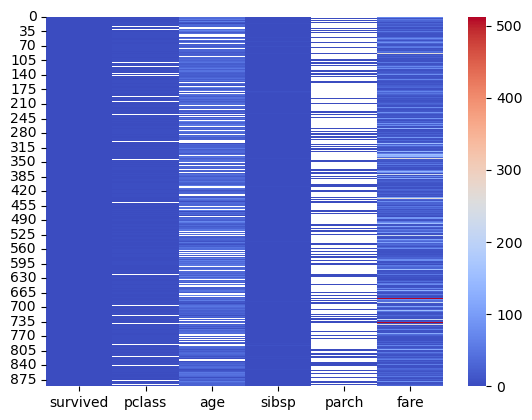


The missing values per column is :
survived      0
pclass       44
age         177
sibsp         0
parch       623
fare          0
dtype: int64

The dataframe after dropping columns with more than 60% NaN are : 
     survived  pclass   age  sibsp     fare
0           0     3.0  22.0      1   7.2500
1           1     1.0  38.0      1  71.2833
2           1     3.0  26.0      0   7.9250
3           1     1.0  35.0      1  53.1000
4           0     3.0  35.0      0   8.0500
..        ...     ...   ...    ...      ...
886         0     NaN  27.0      0  13.0000
887         1     1.0  19.0      0  30.0000
888         0     3.0   NaN      1  23.4500
889         1     1.0  26.0      0  30.0000
890         0     3.0  32.0      0   7.7500

[891 rows x 5 columns]



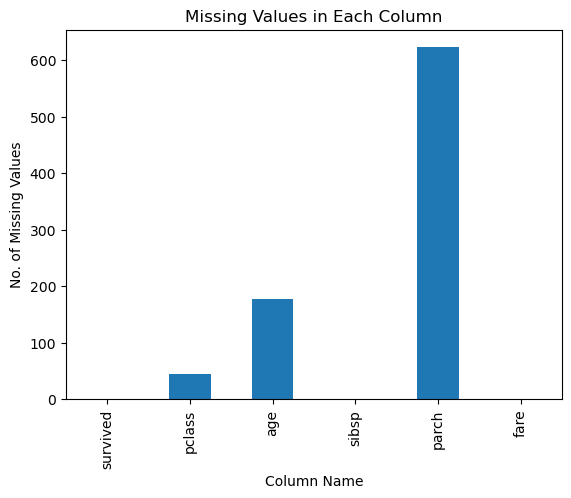

In [312]:
print(f"The first 5 rows are : \n{numeric_df.head(5)}\n")

heat_map = sns.heatmap(numeric_df, cmap="coolwarm")
plt.show()                                    #the missing values are the white strips

#missing values
missing = numeric_df.isnull().sum()

missing.plot(kind = "bar", xlabel = "Column Name", ylabel = "No. of Missing Values", title = "Missing Values in Each Column")


print(f"\nThe missing values per column is :\n{missing}\n")

perc_missing = missing/len(numeric_df)
dropped_df = numeric_df.loc[:,perc_missing <= 0.6]

print(f"The dataframe after dropping columns with more than 60% NaN are : \n{dropped_df}\n")

#It is a common rule in data cleaning as if we imputate columns with more 60% NaN values, then it may introduce biasness and inaccuracy

**Q2** **Handle Missing Values**
- For the `pclass` column, use **mode imputation** to fill the missing values.
- Explain why mode imputation is appropriate for this column.

- How would you impute the values for the column `age`. Why?


In [449]:

means_before = numeric_df.mean()

mode_of_pclass = numeric_df["pclass"].mode()[0]
numeric_df["pclass"] = numeric_df["pclass"].fillna(mode_of_pclass)

print(numeric_df["pclass"])

#why mode imputation is appropriate for this column? .
#The main reason to use "mode" imputation for the column pclass is as mode imputation retains the most frequent value and this reduces the distortion in our column pclass.


#3rd subquestion answered on next cell


0      3.0
1      1.0
2      3.0
3      1.0
4      3.0
      ... 
886    3.0
887    1.0
888    3.0
889    1.0
890    3.0
Name: pclass, Length: 891, dtype: float64


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

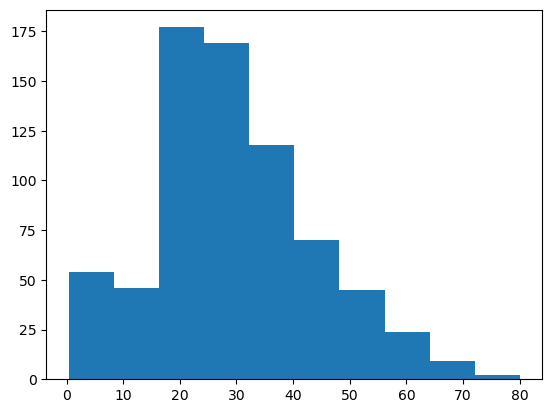

In [187]:
#now first plotting a histrogram of the column age to check if the distribution is skewed or normal

plt.hist(numeric_df["age"])

In [451]:
#as seen the distrubution is somewhat normal (looking like a bell curve)
#therefore using the median imputation would be ideal the column "age", as it is mostly skewed by younger age poeple.

median_of_age = numeric_df["age"].median()
numeric_df["age"] = numeric_df["age"].fillna(median_of_age)

print(f"The imputed age column :\n {numeric_df["age"]}\n")

The imputed age column :
 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64




**Q3** **Analyze Results**
- Compare the dataset before and after imputation:
  - Count the missing values after imputation.
  - Calculate the **mean** of all numeric columns before and after imputation.

In [325]:

missing_val = numeric_df.isnull().sum()
print(f"Missing value: {missing_val}\n")

means_after = numeric_df.mean()

print(f"The means before imputation for all columns :\n{means_before}\n")
print(f"The means after imputation for all coumns : \n{means_after}\n")


Missing value: survived      0
pclass        0
age           0
sibsp         0
parch       623
fare          0
dtype: int64

The means before imputation for all columns :
survived     0.383838
pclass       2.340067
age         29.699118
sibsp        0.523008
parch        0.399254
fare        32.204208
dtype: float64

The means after imputation for all coumns : 
survived     0.383838
pclass       2.340067
age         29.361582
sibsp        0.523008
parch        0.399254
fare        32.204208
dtype: float64



## 5. Pandas: Merging Joining and Concatenation

**Q1.You have two DataFrames `df1` and `df2` where `df1` has a column `student_id` and `df2` has a column `student_id` along with `grade`, how would you merge these DataFrames on `student_id` to keep only the rows present in both DataFrames? Show output of the merge.**

```python
data1 = {
    'student_id': [1, 2, 3, 4],
    'name': ['Alice', 'Bob', 'Charlie', 'David']
}
data2 = {
    'student_id': [2, 3, 4, 5],
    'grade': ['A', 'B', 'C', 'D']
}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

In [329]:
data1 = {
    'student_id': [1, 2, 3, 4],
    'name': ['Alice', 'Bob', 'Charlie', 'David']
}
data2 = {
    'student_id': [2, 3, 4, 5],
    'grade': ['A', 'B', 'C', 'D']
}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

pd.merge(df1, df2, how = "outer")

,student_id,name,grade
0,1,Alice,NaN
1,2,Bob,A
2,3,Charlie,B
3,4,David,C
4,5,NaN,D


**Q2.If you are provided with two DataFrames, employees and departments with `employee_id` as the index, how would you join them such that all rows from the employees DataFrame are kept, even if there is no matching department record? (you may assume employees have 2nd column as `employee_name` and departments have 2nd column as `department_name`, and randomly assign its data)**

```python
employees_data = {
    'employee_id': [1, 2, 3, 4],
    'employee_name': ['Alice', 'Bob', 'Charlie', 'David']
}
departments_data = {
    'employee_id': [2, 3, 4, 1],
    'department_name': ['A', 'B', 'C', 'D']
}

employees = pd.DataFrame(employees_data)
departments = pd.DataFrame(departments_data)
```



In [334]:
employees_data = {
    'employee_id': [1, 2, 3, 4],
    'employee_name': ['Alice', 'Bob', 'Charlie', 'David']
}
departments_data = {
    'employee_id': [2, 3, 4, 1],
    'department_name': ['A', 'B', 'C', 'D']
}

employees = pd.DataFrame(employees_data)
departments = pd.DataFrame(departments_data)

pd.merge(employees, departments, how = 'left', on = "employee_id")    # how = left  keeps the rows from the left dataframe and add the similar ones from the right.

,employee_id,employee_name,department_name
0,1,Alice,D
1,2,Bob,A
2,3,Charlie,B
3,4,David,C


**Q3. Given two DataFrames `df_a` and `df_b` with the same columns, how would you concatenate them vertically, resetting the index so it starts from zero in the combined DataFrame? (you may assume both dataframes have 2 columns each, and randomly assign its data)**

```python
df1 = {
    'student_id': [1, 2, 3, 4],
    'name': ['Alice', 'Bob', 'Charlie', 'David']
}
df2 = {
    'student_id': [5, 6, 7, 8],
    'name': ['Anish', 'Divakar', 'Vaibhav', 'Tanvi']
}

df_a = pd.DataFrame(df1)
df_b = pd.DataFrame(df2)
```


In [337]:
df1 = {
    'student_id': [1, 2, 3, 4],
    'name': ['Alice', 'Bob', 'Charlie', 'David']
}
df2 = {
    'student_id': [5, 6, 7, 8],
    'name': ['Anish', 'Divakar', 'Vaibhav', 'Tanvi']
}

df_a = pd.DataFrame(df1)
df_b = pd.DataFrame(df2)

pd.concat([df_a, df_b], axis = 0, ignore_index = True)


,student_id,name
0,1,Alice
1,2,Bob
2,3,Charlie
3,4,David
4,5,Anish
5,6,Divakar
6,7,Vaibhav
7,8,Tanvi


## 6. Pandas: Advanced Operations (Evaluation and Query)

You are provided with the dataset, `iris`, which contains information about iris flower species and their physical measurements. Your task is to use :

**Q1** **Pandas advanced operations** such as evaluation (`eval`) and conditional querying (`query`) to analyze and extract insights from the dataset.


**Q2** **Load and Inspect the Data**
- Run `iris = sns.load_dataset('iris')` to load the dataset.
- Display the first 5 rows of the dataset.
- Print the summary statistics of the dataset.

In [339]:
iris = sns.load_dataset('iris')

print(f"The first 5 row are : \n{iris.head(5)}\n")
print(f"\nThe descriptiona about iris is:\n{iris.describe()}\n")

The first 5 row are : 
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


The descriptiona about iris is:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000



**Q3** **Filter the Data Using `query`**
- Use the `query` method to:
  1. Find all flowers with a `sepal_length`> 6.5 and a `petal_length` > 5.
  2. Find all `virginica` flowers with a `petal_width` less than 2.

In [341]:
iris_1 = iris.query("sepal_length > 6.5" and "petal_length >5" and "petal_width < 2" and "species == 'virginica' ")
iris_1

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica
105,7.6,3.0,6.6,2.1,virginica
106,4.9,2.5,4.5,1.7,virginica
107,7.3,2.9,6.3,1.8,virginica
108,6.7,2.5,5.8,1.8,virginica
109,7.2,3.6,6.1,2.5,virginica


**Q4** **Use `eval` for Calculations**
- Create a new column `petal_area` using the formula:  
  `petal_area = petal_length * petal_width`
- Display the top 5 flowers with the largest `petal_area`.
- Use `query` to filter flowers that meet the following conditions:
  - `petal_area` > 10
  - `sepal_length` is in the range 5 to 7.

In [344]:
iris.eval('petal_area = (petal_length*petal_width)', inplace = True)

top_5_flowers = iris.sort_values(by = 'petal_area', ascending=False).head(5)
top_5_flowers

#next sub-question done in next cell as "top_5_flowers" werent being displayed properly using print

,sepal_length,sepal_width,petal_length,petal_width,species,petal_area
118,7.7,2.6,6.9,2.3,virginica,15.87
109,7.2,3.6,6.1,2.5,virginica,15.25
100,6.3,3.3,6.0,2.5,virginica,15.00
117,7.7,3.8,6.7,2.2,virginica,14.74
144,6.7,3.3,5.7,2.5,virginica,14.25


In [ ]:
filtered_iris = iris.query("petal_area > 10" and " 5 <= sepal_length <= 7")
filtered_iris

,sepal_length,sepal_width,petal_length,petal_width,species,petal_area
0,5.1,3.5,1.4,0.2,setosa,0.28
4,5.0,3.6,1.4,0.2,setosa,0.28
5,5.4,3.9,1.7,0.4,setosa,0.68
7,5.0,3.4,1.5,0.2,setosa,0.30
10,5.4,3.7,1.5,0.2,setosa,0.30
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,11.96
146,6.3,2.5,5.0,1.9,virginica,9.50
147,6.5,3.0,5.2,2.0,virginica,10.40
148,6.2,3.4,5.4,2.3,virginica,12.42


**Q5** **Analyze and Visualize**
- Perform a group-wise analysis:
  1. Calculate the **average petal length** for each species.
  2. Find the **count of flowers** for each species.
  3. Create a scatter plot of `sepal_length` vs. `petal_length`, colored by species.

The average petal length for each species: 
species
setosa        1.462
versicolor    4.260
virginica     5.552
Name: petal_length, dtype: float64

The count of each flower: 
species
setosa        50
versicolor    50
virginica     50
dtype: int64



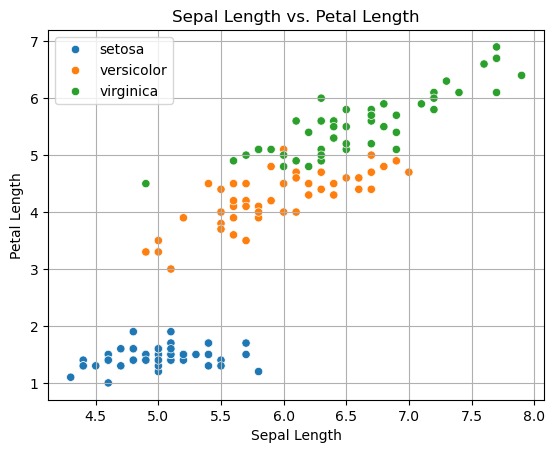

In [346]:
average_petal_length = iris.groupby("species")["petal_length"].mean()
count_flowers = iris.groupby("species").size()

print(f"The average petal length for each species: \n{average_petal_length}\n")
print(f"The count of each flower: \n{count_flowers}\n")

#scatterplot

sns.scatterplot(x = iris['sepal_length'], y = iris['petal_length'], hue = iris["species"])     #used seaborn as matplotlib doesnt have hue argument

plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Sepal Length vs. Petal Length')
plt.legend()
plt.grid(True)
plt.show()

## 7. Matplotlib: Basic Plotting Questions


**Q1. Line Plot**

Plot a sine wave (\(y = sin(x)\)) for \(x in [0, 2π]\). Customize the plot by:
1. Adding a title to the graph.
2. Adding labels for the x-axis and y-axis.
3. Displaying a grid.

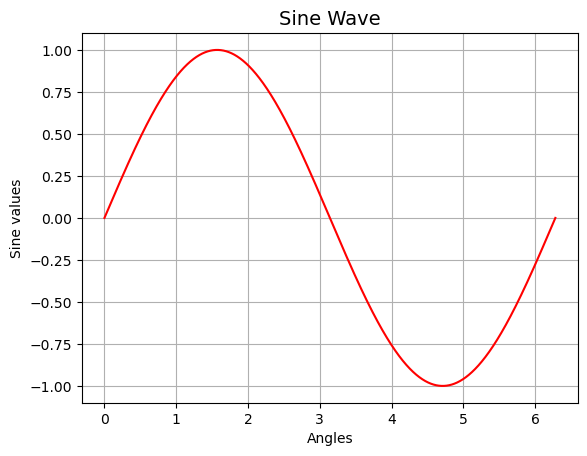

In [348]:
fig, ax  = plt.subplots()
angles = np.linspace(0, 2*np.pi, 10000)
sin_fn = np.sin(angles)

ax.plot(angles, sin_fn, color = 'r')
ax.set_title("Sine Wave", fontsize = 14)
ax.set_xlabel("Angles")
ax.set_ylabel("Sine values")
ax.grid(True)

**Q2. Multiple Line Plots**

Plot the following functions on the same graph for \(x \in [0, 2π]\):
1. \(y_1 = sin(x)\)
2. \(y_2 = cos(x)\)

Customize the graph by:
- Using different colors and line styles for each function.
- Adding a legend to identify the curves.

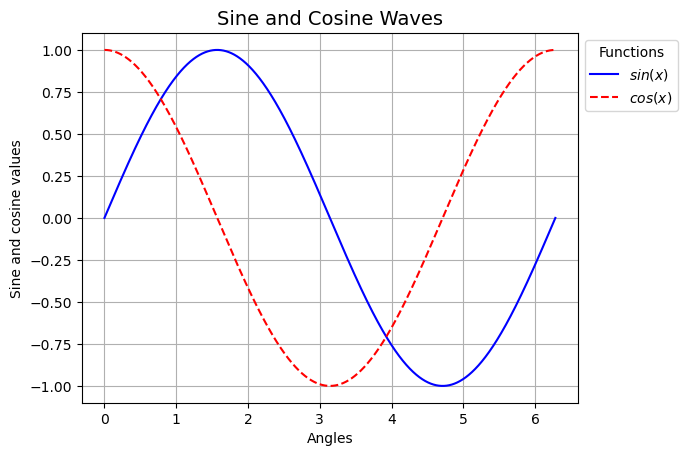

In [353]:
fig, ax  = plt.subplots()
angles = np.linspace(0, 2*np.pi, 10000)

sin_fn = np.sin(angles)
cos_fn = np.cos(angles)

ax.plot(angles, sin_fn, label = "$sin(x)$", linestyle = "-", color = 'b')
ax.plot(angles, cos_fn, label = "$cos(x)$", linestyle = "--", color = 'r')
ax.set_title("Sine and Cosine Waves", fontsize = 14)
ax.set_xlabel("Angles")
ax.set_ylabel("Sine and cosine values")
ax.legend(bbox_to_anchor = (1, 1), title = "Functions")                         # bbox_to_anchor = (1, 1) to display legend outside the plot.
ax.grid(True)


**Q3. Plot Customization**

Plot the function \(y = x^2\) for \(x \in [-10, 10]\).  
Customize the plot by:
1. Adding a title and axis labels.
2. Changing the line style, color, and thickness.
3. Adjusting the axis limits to make the graph more visually appealing.

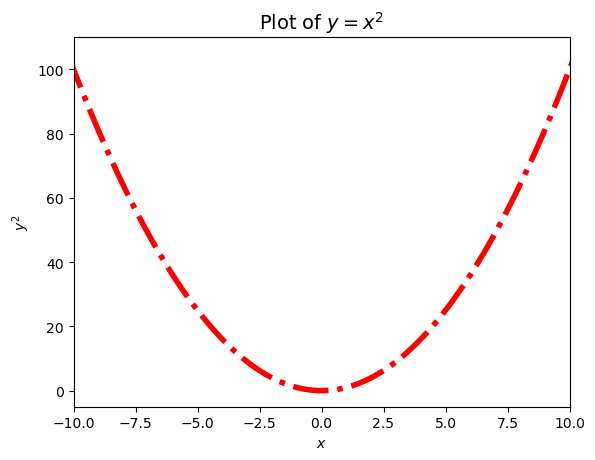

In [378]:
fig, ax  = plt.subplots()

x = np.linspace(-100, 100, 1000)
y = x**2

ax.plot(x, y, linestyle = "-.", linewidth = 4, color = 'r')

ax.set_title("Plot of $y = x^2$", fontsize = 14)
ax.set_xlabel('$x$')
ax.set_ylabel('$y^2$')
ax.set_xlim(-10, 10)
ax.set_ylim(-5, 110)

plt.show()

## 8a. Bar Plot

**Q1** **You are provided with the `tips` dataset. Your task is to create a **bar plot** using Matplotlib.**

- Load the `tips` dataset using Seaborn:  
  ```python
  import seaborn as sns
  tips = sns.load_dataset('tips')
```
- Create a bar plot showing the average tip for each day of the week.
Label the x-axis as Day, the y-axis as Average Tip, and add a title: "Average Tip by Day".

- Based on the bar plot, which day has the highest average tip?


The day which ahs the highest average tip is: Sun



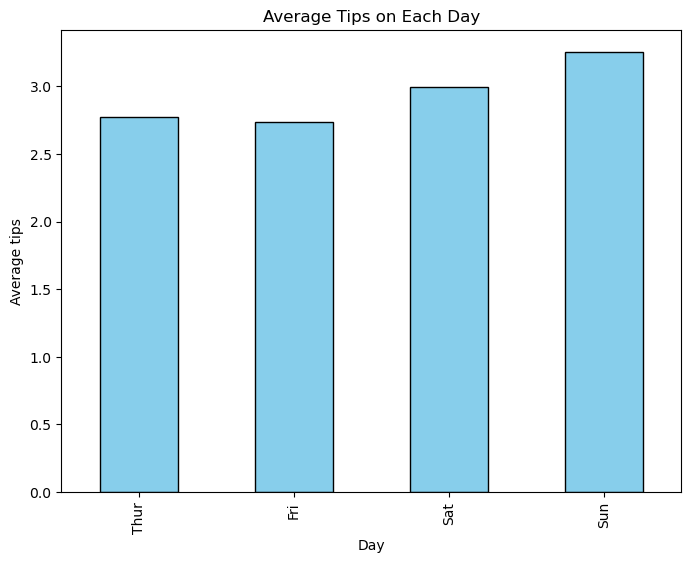

In [383]:
tips = sns.load_dataset('tips')
average_tips = tips.groupby("day").tip.mean()
bars = average_tips.plot(kind='bar', color='skyblue', edgecolor = 'k', figsize=(8, 6), xlabel='Day', ylabel='Average tips', title='Average Tips on Each Day')

print(f"The day which ahs the highest average tip is: {average_tips.idxmax()}\n")

Based on the bar-plot above the **Sunday** has the highest average tip

## 8b. Scatter Plot

**Q1. You are provided with the `tips` dataset. Your task is to create a scatter plot using Matplotlib.**

- Load the `tips` dataset using Seaborn:  
  ```python
  import seaborn as sns
  tips = sns.load_dataset('tips')
  ```

- Create a scatter plot with total_bill on the x-axis and tip on the y-axis.
- Label the x-axis as Total Bill, the y-axis as Tip, and add a title: "Relationship between Total Bill and Tip".

- Based on the scatter plot, do you observe any relationship between total_bill and tip?


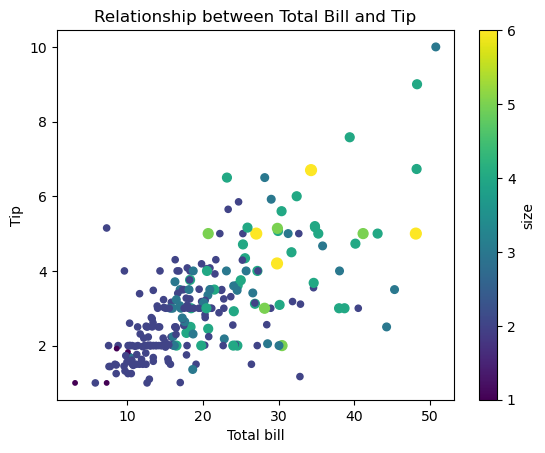

In [390]:
tips = sns.load_dataset('tips')

fig, ax = plt.subplots()
tips.plot.scatter(x='total_bill', y='tip', c='size',colormap = 'viridis', s = tips['size']*10, ax = ax, xlabel = "Total bill", ylabel = "Tip",title = "Relationship between Total Bill and Tip")

plt.show()


There appears to be a positive relationship between `total_bill` and `tip`. As the total bill increases, the tip generally tends to increase as well. However, the relationship **does not appear to be perfectly linear**, and there is some **variability** in the amount of tip given for a given total bill

## 9. Matplotlib: Subplots and Layouts








**Q1. Create a 2x2 grid of subplots with:**
- Subplot (1,1): Plot y = sin(x).
- Subplot (1,2): Plot y = cos(x) .
- Subplot (2,1): Plot y = e<sup>−x</sup>
- Subplot (2,2): Plot y=ln(x) for x∈[0.1,2].

Customize background colors, add unique x and y labels, and set titles.

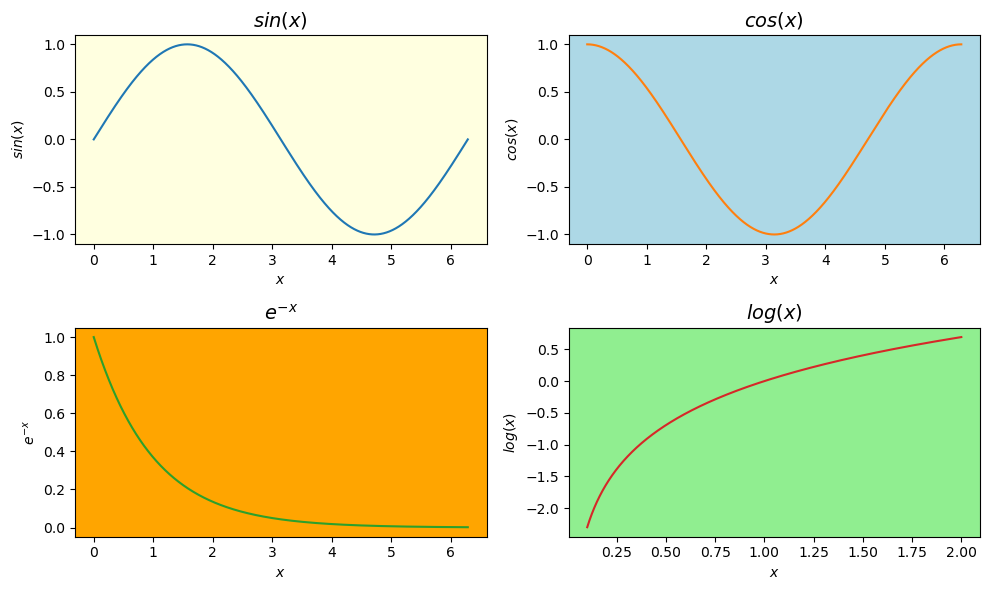

In [418]:

fig, ax = plt.subplots(2, 2, figsize = (10, 6))



x_1 = np.linspace(0, 2*np.pi, 10000)
y_1 = np.sin(x_1)
x_2 = np.linspace(0.1, 2, 10000)
y_2 = np.cos(x_1)
y_3 = np.exp(-(x_1))
y_4 = np.log(x_2)

ax[0, 0].plot(x_1, y_1, color = 'C0')
ax[0, 0].set_title("$sin(x)$", fontsize = 14)
ax[0, 0].set_xlabel("$x$")
ax[0, 0].set_ylabel("$sin(x)$")
ax[0, 0].set_facecolor('lightyellow')

ax[0, 1].plot(x_1, y_2, color = 'C1')
ax[0, 1].set_title("$cos(x)$", fontsize = 14)
ax[0, 1].set_xlabel("$x$")
ax[0, 1].set_ylabel("$cos(x)$")
ax[0, 1].set_facecolor('lightblue')

ax[1, 0].plot(x_1, y_3, color = 'C2')
ax[1, 0].set_title("$e^{-x}$", fontsize = 14)
ax[1, 0].set_xlabel("$x$")
ax[1, 0].set_ylabel("$e^{-x}$")
ax[1, 0].set_facecolor('orange')


ax[1, 1].plot(x_2, y_4, color = 'C3')
ax[1, 1].set_title("$log(x)$", fontsize = 14)
ax[1, 1].set_xlabel("$x$")
ax[1, 1].set_ylabel("$log(x)$")
ax[1, 1].set_facecolor('lightgreen')

fig.tight_layout()


**Q2. Create a subplot within another subplot:**
- Main subplot: Display a scatter plot of 100 random points with x and y values between 0 and 1.
- Inset subplot: Display a histogram of the x-values from the scatter plot.

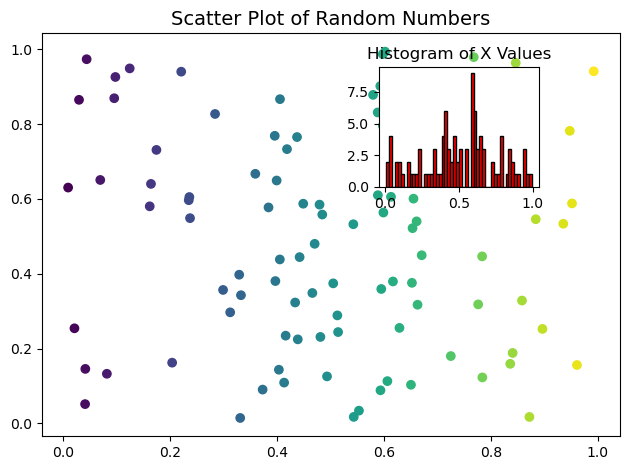

In [421]:
fig, main_ax = plt.subplots()
arr_x = np.random.rand(100)
arr_y = np.random.rand(100)
colors = arr_x
main_ax.scatter(arr_x, arr_y, c = colors, cmap = "viridis")
main_ax.set_title("Scatter Plot of Random Numbers", fontsize = 14)

inset_ax = fig.add_axes([0.6, 0.6, 0.25, 0.25])
inset_ax.hist(arr_x, bins = 50, color = 'r', edgecolor = 'k')
inset_ax.set_title("Histogram of X Values")
fig.tight_layout()

**Q3. Create a Layout with One Large and Two Smaller Subplots**

- Design a large subplot occupying the top two-thirds of the figure and plot \( y = sin(x) \) and \( y = cos(x) \) on the same graph.  

- Create two smaller subplots in the bottom row:  
   - On the left, plot y =x<sup>2</sup>.  
   - On the right, plot y = e<sup>x</sup>.  

Ensure each subplot has appropriate titles, axis labels, and legends where necessary. Use a clean layout that avoids overlapping elements.

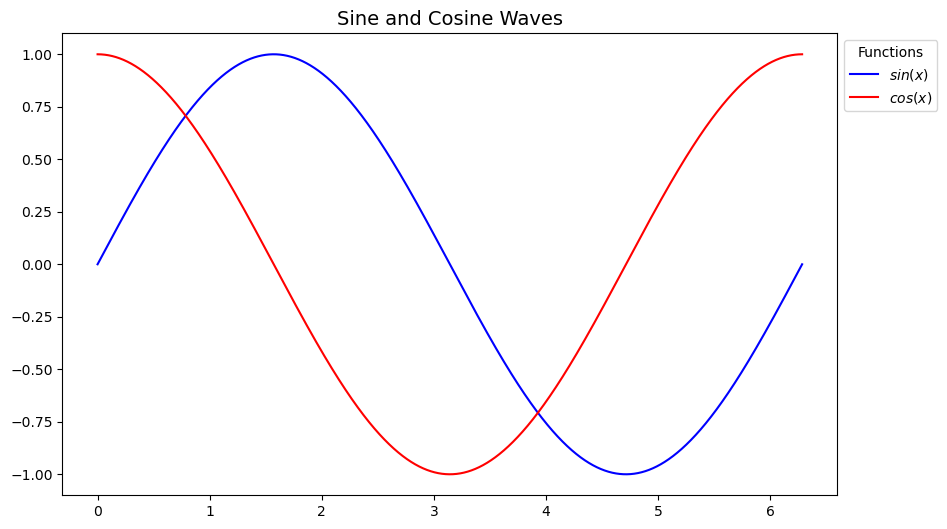

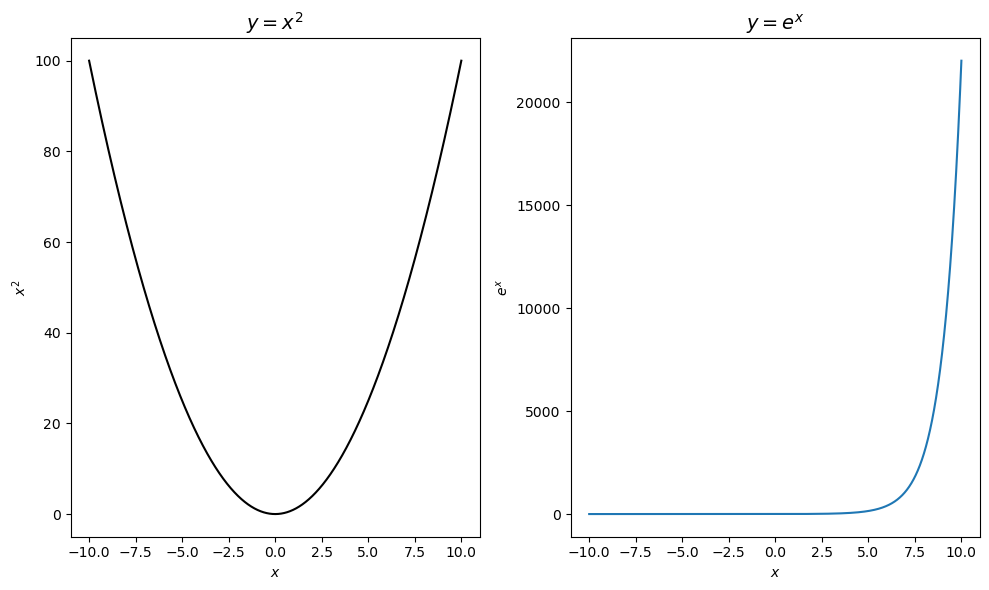

In [429]:
fig_1, ax = plt.subplots(figsize = (10, 6))
angles = np.linspace(0, 2*np.pi, 10000)
                    
sin_fn = np.sin(angles)
cos_fn = np.cos(angles)

ax.plot(angles, sin_fn, label = "$sin(x)$", color = 'b')
ax.plot(angles, cos_fn, label = "$cos(x)$", color = 'r')
ax.set_title("Sine and Cosine Waves", fontsize = 14)
ax.legend(bbox_to_anchor = (1, 1), title = "Functions")

fig, ax_2 = plt.subplots(1, 2, figsize = (10, 6))
x = np.linspace(-10, 10, 10000)
y_1 = x**2
y_2 = np.exp(x)

ax_2[0].plot(x, y_1, color = 'k')
ax_2[0].set_title("$y=x^2$", fontsize = 14)
ax_2[0].set_xlabel("$x$")
ax_2[0].set_ylabel("$x^2$")
ax_2[1].plot(x, y_2, color = 'C0')
ax_2[1].set_title("$y=e^x$", fontsize = 14)
ax_2[1].set_xlabel("$x$")
ax_2[1].set_ylabel("$e^x$")

plt.tight_layout()


## 10. Matplotlib: Advanced Customization

**Q1. Customizing Axes and Ticks**

Create a line plot for y = x^2 in the range -10 to 10.
Customize the axes and ticks:
1. Set x-axis range to -10 to 10.
2. Set y-axis range to 0 to 100.
3. Use custom tick marks at intervals of 2 for x-axis and 10 for y-axis.
4. Rotate x-axis tick labels by 45 degrees.

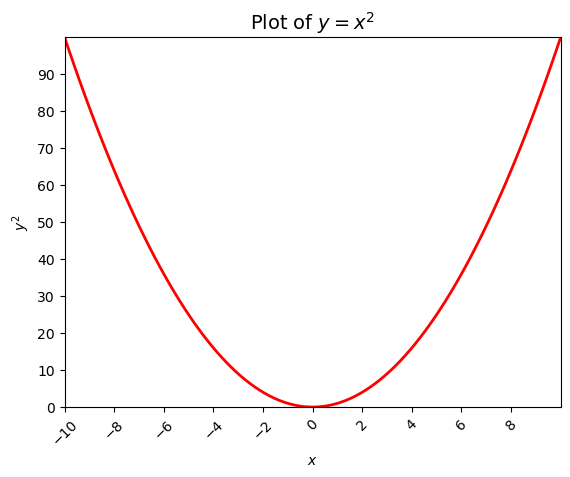

In [433]:
fig, ax  = plt.subplots()
x = np.linspace(-10, 10, 100)
y = x**2

ax.plot(x, y, linewidth = 2, color = 'r')

ax.set_title("Plot of $y = x^2$", fontsize = 14)
ax.set_xlim(-10, 10)
ax.set_ylim(0, 100)
ax.set_xticks(np.arange(-10, 10, 2))
ax.set_yticks(np.arange(0, 100, 10))
ax.tick_params(axis = 'x', rotation = 45)
ax.set_xlabel('$x$')
ax.set_ylabel('$y^2$')

plt.show()

**Q2. Multiple Subplots with Shared Legend and Grid Customization**

Create a figure with four subplots (2x2 grid) showing different trigonometric functions:
1. Top-left: y = sin(x)
2. Top-right: y = cos(x)
3. Bottom-left: y = tan(x) (restrict x to avoid undefined regions).
4. Bottom-right: y = sin^2(x) + cos^2(x) (should always equal 1).

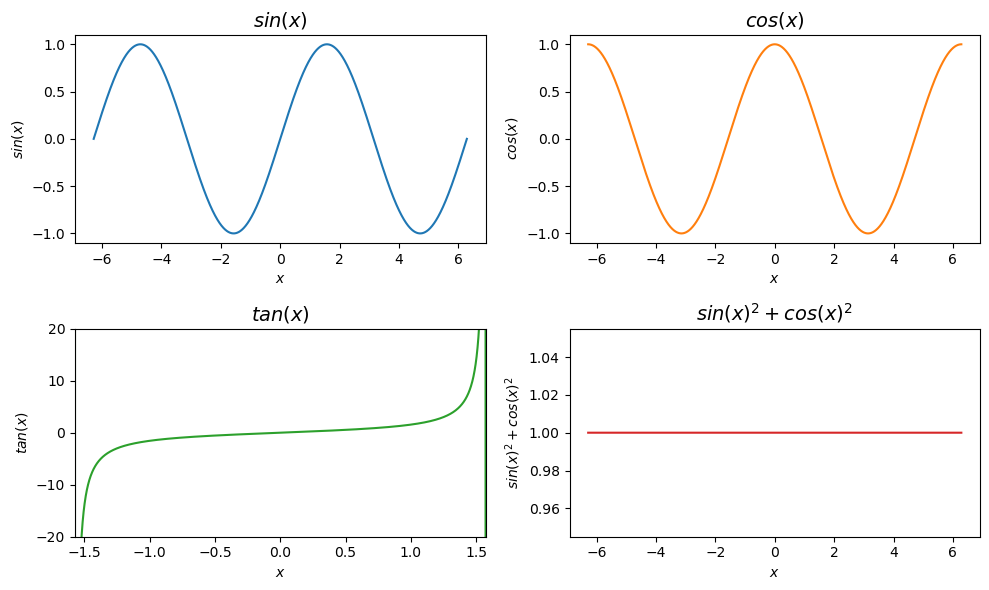

In [436]:
fig, ax = plt.subplots(2, 2, figsize = (10, 6))
x_1 = np.linspace(-2*np.pi, 2*np.pi, 10000)
y_1 = np.sin(x_1)
y_2 = np.cos(x_1)
y_3 = np.tan(x_1)
y_4 = (np.sin(x_1))**2 + (np.cos(x_1))**2

ax[0, 0].plot(x_1, y_1, color = 'C0')
ax[0, 0].set_title("$sin(x)$", fontsize = 14)
ax[0, 0].set_xlabel("$x$")
ax[0, 0].set_ylabel("$sin(x)$")

ax[0, 1].plot(x_1, y_2, color = 'C1')
ax[0, 1].set_title("$cos(x)$", fontsize = 14)
ax[0, 1].set_xlabel("$x$")
ax[0, 1].set_ylabel("$cos(x)$")

ax[1, 0].set_ylim(-20, 20)
ax[1, 0].plot(x_1, y_3, color = 'C2')
ax[1, 0].set_title("$tan(x)$", fontsize = 14)
ax[1, 0].set_xlabel("$x$")
ax[1, 0].set_ylabel("$tan(x)$")
ax[1,0].set_xlim(-np.pi/2,np.pi/2)   #bound from -pi/2 to pi/2 to avoid the discontinuity 

ax[1, 1].plot(x_1, y_4, color = 'C3')
ax[1, 1].set_title("${sin(x)}^2 + {cos(x)}^2$", fontsize = 14)
ax[1, 1].set_xlabel("$x$")
ax[1, 1].set_ylabel("${sin(x)}^2 + {cos(x)}^2$")

fig.tight_layout()

**Q3. Subplots and Shared Axes**

Create two subplots side-by-side:
1. Bar chart for sales (random data) from January to June.
2. Line chart for cumulative sales.
Share the y-axis and add titles, a common x-axis label, and a grid for the second plot.

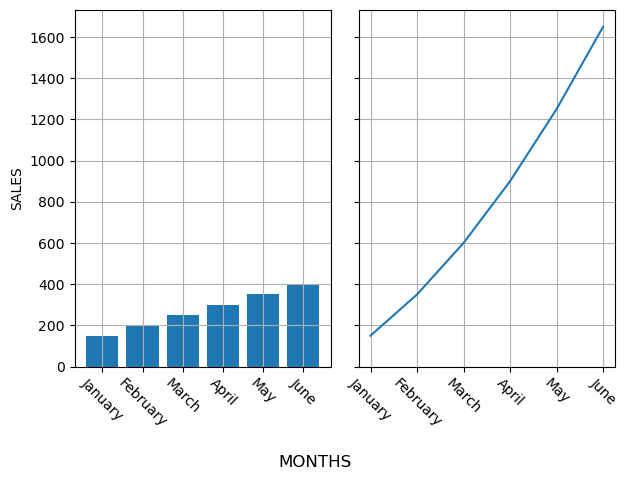

In [439]:
#using example csv file named sales_data.csv

sales_df = pd.read_csv ("sales_data.csv")
cum_sales = np.cumsum(sales_df["Sales"])

fig,ax = plt.subplots(1,2,sharey = True)

ax[0].bar(sales_df["Month"],sales_df["Sales"])
ax[0].set_xticklabels(sales_df["Month"],rotation = -45)
ax[0].grid(True)
ax[0].set_ylabel("SALES")

ax[1].plot(sales_df["Month"],cum_sales)
ax[1].set_xticklabels(sales_df["Month"],rotation = -45)
ax[1].grid(True)

fig.supxlabel("MONTHS")
fig.tight_layout()


**Q4. Adding Annotations**

Create a scatter plot of 10 random points:
1. Annotate the point with the max y-coordinate with a red star and text label.
2. Customize marker size and color for all points.

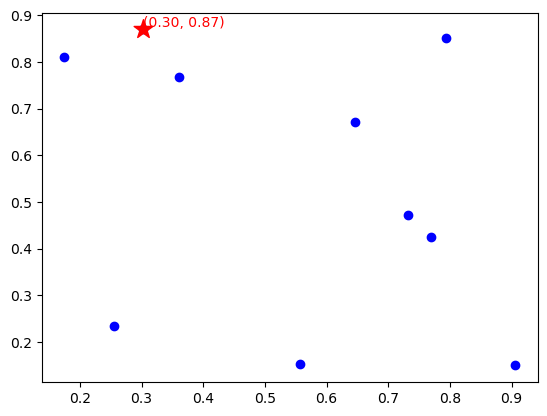

In [447]:
fig, ax = plt.subplots()
x = np.random.rand(10)
y = np.random.rand(10)

ax.scatter(x, y, color = 'b', marker = 'o')

max_y_ind = np.argmax(y)
max_y_coordinate = y[max_y_ind]
max_x_coordinate = x[max_y_ind]

ax.scatter(max_x_coordinate, max_y_coordinate, color = 'r', marker = '*', s = 200)
ax.text(max_x_coordinate, max_y_coordinate, f"({max_x_coordinate:.2f}, {max_y_coordinate:.2f})", fontsize=10, color='red', ha='left', va='bottom')

plt.show()


**Q5. Creating a Custom Colormap**

Generate a heatmap for a 5x5 matrix of random numbers between 0 and 1:
1. Use a custom colormap (blue to red).
2. Add a color bar and display exact cell values rounded to 2 decimals.

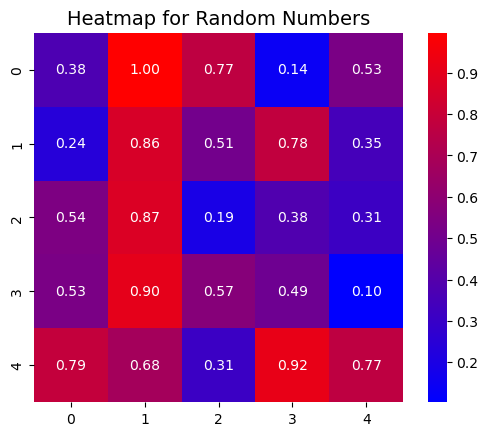

In [262]:
matrix = np.random.rand(5, 5)

fig, ax = plt.subplots()
customized_cmap = LinearSegmentedColormap.from_list("blue_rea", ["blue", "red"])
sns.heatmap(matrix, cmap = customized_cmap, annot = True, fmt = '.2f', square = True)

ax.set_title("Heatmap for Random Numbers", fontsize =  14)
plt.show()


# im = ax.imshow(matrix, cmap = customized_cmap)
# fig.colorbar(im, ax = ax)
# for i in range(5):
#     for j in range(5):
#         ax.text(j, i, f'{matrix[i, j]:.2f}', ha='center', va='center', color='black', fontsize=10)

**Q6. Customization of 3D Plot**

Using Matplotlib’s mpl_toolkits.mplot3d, create a 3D surface plot for the function:
z = sin(sqrt(x^2 + y^2))

Requirements:
1. Generate x and y values in the range -5 to 5 using a meshgrid.
2. Use a custom colormap that highlights peaks and valleys (e.g., `coolwarm`).
3. Add a color bar with a label "Amplitude".
4. Add labels for all three axes and a title.
5. Rotate the 3D plot to a custom viewing angle using ax.view_init.

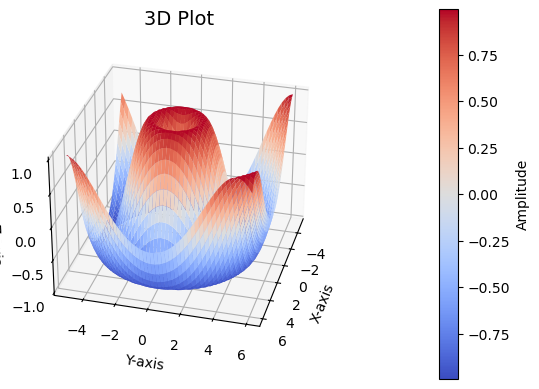

In [242]:
fig, ax = plt.subplots(subplot_kw = {"projection": "3d"})
x = np.linspace(-5, 6)
y = np.linspace(-5, 6)
X, Y = np.meshgrid(x,y)
Z = np.sin((X**2 + Y**2)**(1/2))

surface = ax.plot_surface(X, Y, Z, cmap = 'coolwarm')

ax.set_title('3D Plot', fontsize=14)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

ax.view_init(azim = 15)
fig.colorbar(surface, label = "Amplitude", pad = 0.2)

plt.show()

## EXTRA QUESTIONS 

## Definition of a Partition

A collection of sets \\(\{A_1, \ldots, A_n\}\\) is a **partition** of the universal set \\(\Omega\\) if it satisfies the following conditions:

- **Non-overlap**: \\(\{A_1, \ldots, A_n\}\\) is disjoint.
- **Decompose**: \\(A_1 \cup A_2 \cup \ldots \cup A_n = \Omega\\).

---

## Important Laws

### Distributive (How to mix union and intersection)
$$
A \cap (B \cup C) = (A \cap B) \cup (A \cap C)
$$

$$
A \cup (B \cap C) = (A \cup B) \cap (A \cup C)
$$

---

### De Morgan’s Law (How to complement over intersection and union)

$$
(A \cap B)^c = A^c \cup B^c
$$

$$
(A \cup B)^c = A^c \cap B^c
$$


**Question 1: Function to Check Partition**  
Write a Python function to check if a given list of sets is a partition of a universal set. The function should take the universal set and the list of sets as arguments and verify the following conditions:
1. The union of all subsets in the list equals the universal set.
2. The subsets are pairwise disjoint.

Write your function and test it with an example.

In [174]:

def is_partition(sets, universal_set) : 
    
    union_of_sets = set().union(*sets)       #Union of all sets in the list
    if union_of_sets != universal_set:       #This will check the first required condition
        return False 

    for i in range(len(sets)):
        for j in range(len(sets)):
            if len(np.intersect1d(sets[i], sets[j])) != 0 and i != j:  #This will check the second condition and will return false as soon as any pair of sets are disjoint 
                return False
    return True                              #If both the conditions are true then in the end the function will return true 

#testing the function with examples

# Example 1

universal_set = {1, 2, 3, 4}
sets_1 = [{1, 2}, {3}, {4}]
print(is_partition(sets_1, universal_set))  

# Example 2: sets are not disjoint

sets_2 = [{1, 2}, {2, 3}, {4}, {2, 1}]
print(is_partition(sets_2, universal_set))  

# Example 3:union is not universal set
sets_3 = [{1, 2}, {5, 6}, {7}]

print(is_partition(sets_3, universal_set))  


True
False
False


**Question 2: Laws**  
With an example numpy array corresponding to set A, B, C, show the distributive properties and De Morgan's Laws.  
Also, use `venn3` from `matplotlib_venn` library for vizualization.



Checking if the distributive properties are true : True

Checking if the morgan law is true : True



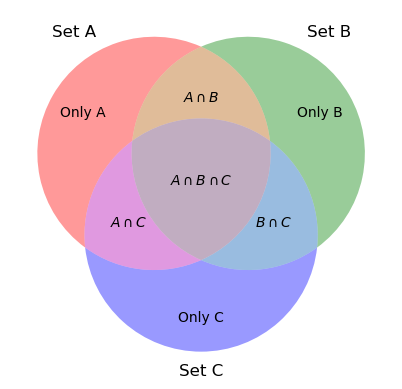

In [114]:
from matplotlib_venn import venn3

A = np.array([1, 3, 2, 10, 6, 9])
B = np.array([5, 3, 17, 10, 8, 9])
C = np.array([4, 72, 23, 10, 34, 7])

universal_set = np.union1d(A, np.union1d(B, C))

A_intrsct_B = np.intersect1d(A, B)
A_intrsct_C = np.intersect1d(A, C)
B_intrsct_C = np.intersect1d(C, B)

A_uni_B = np.union1d(A,B)
C_uni_B = np.union1d(C,B)
C_uni_A = np.union1d(C,A)

A_intrsct_B_uni_C = np.intersect1d(A, C_uni_B)
A_uni_B_intrsct_C = np.union1d(A, B_intrsct_C)


def negation(set_a):
    neg_set_a = universal_set[~np.isin(universal_set, set_a)]                    
    return neg_set_a                           # ~np.isin(universal_set, set_a) returns a boolean mask. The value is true for the elements which are in U-set_a.


def check_distributive(A, B, C):

    # here we can't directly compare two arrays with ==. As it operates element wise and return a array of boolean values
    
    if np.array_equal(A_intrsct_B_uni_C, np.union1d(A_intrsct_B, A_intrsct_C)) and np.array_equal(A_uni_B_intrsct_C, np.intersect1d(A_uni_B, C_uni_A)):
        return True                                         
    return False


def check_morgan_law(A, B, C):
  
  if np.array_equal(negation(A_intrsct_B), np.union1d(negation(A), negation(B))) and np.array_equal(negation(A_uni_B), np.intersect1d(negation(A), negation(B))):
    return True  
  return False


print(f"Checking if the distributive properties are true : {check_distributive(A, B, C)}\n")
print(f"Checking if the morgan law is true : {check_morgan_law(A, B, C)}\n")

venn = venn3(subsets = (A, B, C), set_labels=('Set A', 'Set B', 'Set C'))

venn.get_label_by_id('100').set_text('Only A')                                  # Label for Set A only
venn.get_label_by_id('010').set_text('Only B')                                  # Label for Set B only
venn.get_label_by_id('001').set_text('Only C')                                  # Label for Set C only
venn.get_label_by_id('110').set_text('$A \cap B$')                               
venn.get_label_by_id('011').set_text('$B \cap C$')                              #using latex 
venn.get_label_by_id('101').set_text('$A \cap C$')
venn.get_label_by_id('111').set_text('$A \cap B \cap C$')

plt.show()

**Question 3: Union and Intersection of Students**  
For below code:
1. The union of all sets of students present across the three subjects.
2. The intersection of all sets of students present across the three subjects.

```python
import pandas as pd
# Dictionary of marks
marks = {
    "Math": {"Alice": 85, "Bob": 90, "Charlie": 78},
    "Physics": {"Bob": 88, "Charlie": 92, "David": 75},
    "Chemistry": {"Alice": 82, "Charlie": 80, "Eve": 91},
}


# Convert the dictionary to a DataFrame
df = pd.DataFrame(marks).T
```

In [116]:
import pandas as pd
# Dictionary of marks
marks = {
    "Math": {"Alice": 85, "Bob": 90, "Charlie": 78},
    "Physics": {"Bob": 88, "Charlie": 92, "David": 75},
    "Chemistry": {"Alice": 82, "Charlie": 80, "Eve": 91},
}


# Convert the dictionary to a DataFrame
df = pd.DataFrame(marks) .T

union_of_students = set(df.columns)
print(f"The union of all sets of students present across the three subjects is: {union_of_students}\n") 

intersection_of_student = set(df.dropna(axis=1))
print(f"The intersection of all sets of students present across the three subjects is: {intersection_of_student}\n")

The union of all sets of students present across the three subjects is: {'David', 'Charlie', 'Bob', 'Alice', 'Eve'}

The intersection of all sets of students present across the three subjects is: {'Charlie'}



**Question 4  
Implement a Python function to compute the cartesian product of two sets A and B without using Python's built-in functions or libraries like itertools. The function should return the cartesian product as a set of ordered pairs (tuples).**


In [7]:
def cartesian_product(a_set, b_set):

    answer = set()
     
    for element_a in a_set:
        for element_b in b_set:
            answer.add((element_a, element_b))
    return answer


#testing the function with examples

A = {1, 2, 3}
B = {3, 4}
print(cartesian_product(A, B),"\n") 

A = {'a', 'b'}
B = {1, 2}
print(cartesian_product(A, B),"\n")  

A = {}
B = {10, 20, 30}
print(cartesian_product(A, B))   #this should print a null set 


{(2, 4), (3, 4), (1, 4), (2, 3), (3, 3), (1, 3)} 

{('a', 2), ('b', 1), ('b', 2), ('a', 1)} 

set()
